In [1]:
from voz_crawler import VozCrawler

crawler = VozCrawler(cache_ttl=3600, delay=1.0)

In [2]:
URL = "https://voz.vn/t/vn-thuan-dev-luong-100tr-kho-%C4%91en-muc-nao.920264/"

# Crawl trang 1
page_data = crawler.crawl_page(URL, page=1)
print(f"Trang {page_data.current_page}/{page_data.total_pages}")
print(f"Số posts: {len(page_data.posts)}")

Trang 1/21
Số posts: 20


In [3]:
# Chuyển sang DataFrame
df = crawler.pages_to_dataframe([page_data])

import pandas as pd
pd.set_option("display.max_colwidth", 120)
df[["page", "post_id", "username", "user_title", "datetime", "reaction_count", "image_count", "link_count", "content_text"]]

,page,post_id,username,user_title,datetime,reaction_count,image_count,link_count,content_text
0,1,30311287,Einherjar006,Senior Member,2024-02-14 21:57:37+07:00,3,0,1,"Nhân tiện có cái comment hay ho này, mình lập post chia sẻ thử topic này cho anh em nào quan tâm. \n \nLưu ý đây là ..."
1,1,30311427,phidoi247,Member,2024-02-14 22:13:38+07:00,3,0,0,tiếng tây nội địa đây à
2,1,30311428,odkjabqpmzvmz,Senior Member,2024-02-14 22:13:47+07:00,0,0,0,"Chưa lên senior member để ưng được cho bác, mà +10 và ủn thớt lên"
3,1,30311488,thiennhank9,Senior Member,2024-02-14 22:18:02+07:00,3,0,0,đúng thật ko tính 2nd job thì mức 100+ gross khoai vl ~ 4k+ gross. Hóng các bro vào chia sẻ.
4,1,30311586,bricks on the wall,Senior Member,2024-02-14 22:28:28+07:00,0,0,0,"quá khoai, tầm 1% lương it VN rồi. Còn remote thì dễ hơn xí"
5,1,30311698,Einherjar006,Senior Member,2024-02-14 22:38:12+07:00,3,0,0,"<quote author=""phidoi247"" post_id=""30311427"">tiếng tây nội địa đây à</quote>\nHa ha, mình cũng cố gắng dùng tiếng Vi..."
6,1,30311777,loser_coding,Senior Member,2024-02-14 22:47:03+07:00,0,0,0,Lên Engineering Manager có còn code không mọi người ?
7,1,30311814,ProfessorX,Senior Member,2024-02-14 22:49:34+07:00,0,0,0,"Lazada ai fix đc chắc lương không dưới 100 chai/tháng nhỉ \nLazada nó vừa chậm, tìm kiếm thọt, bao lâu rồi fix mãi c..."
8,1,30311831,Gạo mắc nhất thế giới,Senior Member,2024-02-14 22:50:52+07:00,3,0,0,"Ông bà nói rồi: ""Phi thương bất phú"" \nThay vì nghĩ cách kiếm 100tr thì cầm số vốn đủ đi kinh doanh tốt hơn"
9,1,30311839,loserboy,Junior Member,2024-02-14 22:51:54+07:00,0,0,0,ước


In [4]:
# Kiểm tra <quote> tags
for _, row in df.iterrows():
    if "<quote" in row["content_text"]:
        print(f"=== Post {row['post_id']} by {row['username']} ===")
        print(row["content_text"][:500])
        print()
        break

=== Post 30311698 by Einherjar006 ===
<quote author="phidoi247" post_id="30311427">tiếng tây nội địa đây à</quote>
Ha ha, mình cũng cố gắng dùng tiếng Việt nhiều nhất rồi đấy, nhưng thuật ngữ xin việc, lương bổng mà dùng từ tiếng Việt nó vừa dài vừa dễ gây hiểu nhầm nữa.



In [ ]:
from voz_crawler import PageOutOfRangeError, ThreadNotFoundError

try:
    page2 = crawler.crawl_page(URL, page=2)
    print(f"Page 2: {len(page2.posts)} posts")
except PageOutOfRangeError as e:
    print(f"Out of range: {e}")

# Thử page quá lớn
try:
    crawler.crawl_page(URL, page=99999)
except PageOutOfRangeError as e:
    print(f"Caught: {e}")

Page 2: 20 posts
Caught: Page 99999 out of range (thread has 21 pages): https://voz.vn/t/vn-thuan-dev-luong-100tr-kho-%C4%91en-muc-nao.920264/


## Crawl toàn bộ thread & Build Reply Graph

In [2]:
URL = "https://voz.vn/t/vn-thuan-dev-luong-100tr-kho-%C4%91en-muc-nao.920264/"

# Crawl toàn bộ các trang
all_pages = crawler.crawl_pages(URL)
print(f"Đã crawl {len(all_pages)} trang, tổng cộng {sum(len(p.posts) for p in all_pages)} posts")

Đã crawl 21 trang, tổng cộng 418 posts


In [3]:
from voz_crawler import extract_reply_edges, edges_to_dataframe, build_reply_graph, compute_graph_stats, plot_reply_graph

# Chuyển toàn bộ dữ liệu sang DataFrame
df = crawler.pages_to_dataframe(all_pages)
print(f"Tổng posts: {len(df)}")

# Trích xuất reply edges từ <quote> tags
edges = extract_reply_edges(df)
edges_df = edges_to_dataframe(edges)
print(f"Tổng số reply edges: {len(edges_df)}")
print(f"Số users tham gia: {len(set(edges_df['from_username']) | set(edges_df['to_username']))}")
edges_df.head(10)

Tổng posts: 418
Tổng số reply edges: 326
Số users tham gia: 105


,from_post_id,from_username,to_post_id,to_username
0,30311698,Einherjar006,30311427,phidoi247
1,30311840,Gạo mắc nhất thế giới,30311814,ProfessorX
2,30311864,ProfessorX,30311840,Gạo mắc nhất thế giới
3,30311865,nguyenduhn,30311777,loser_coding
4,30311888,loser_coding,30311865,nguyenduhn
5,30311907,hoang3blϲ,30311777,loser_coding
6,30311979,Einherjar006,30311814,ProfessorX
7,30312430,buitruong1689,30311907,hoang3blϲ
8,30312491,loser_coding,30312430,buitruong1689
9,30312685,turky mark,30312491,loser_coding


In [4]:
# Build graph & compute stats
G = build_reply_graph(df, edges)
stats = compute_graph_stats(G)

print(f"Graph: {stats.num_nodes} nodes (posts), {stats.num_edges} edges (replies)")

print("\n🔥 Top 10 posts được quote nhiều nhất:")
for pid, user, cnt in stats.top_quoted_posts:
    print(f"  Post #{pid} by {user}: {cnt} lần")

print("\n👤 Top 10 users được quote nhiều nhất:")
for user, cnt in stats.top_quoted_users:
    print(f"  {user}: {cnt} lần")

print("\n💬 Top 10 users reply nhiều nhất:")
for user, cnt in stats.top_repliers:
    print(f"  {user}: {cnt} lần")

Graph: 418 nodes (posts), 325 edges (replies)

🔥 Top 10 posts được quote nhiều nhất:
  Post #30315399 by bestlife: 5 lần
  Post #30592748 by Lord Of Lords: 5 lần
  Post #30597043 by anhkolamgidauanhthe: 5 lần
  Post #34206549 by condao: 5 lần
  Post #30312900 by bestlife: 4 lần
  Post #30316921 by AppSevi: 4 lần
  Post #30318913 by quatinh&deptrai: 4 lần
  Post #30319394 by Gạo mắc nhất thế giới: 4 lần
  Post #30334317 by bricks on the wall: 4 lần
  Post #30564560 by -RedSky-: 4 lần

👤 Top 10 users được quote nhiều nhất:
  bricks on the wall: 17 lần
  condao: 15 lần
  bestlife: 14 lần
  buitruong1689: 13 lần
  quatinh&deptrai: 13 lần
  loser_coding: 12 lần
  freedom.9: 12 lần
  Einherjar006: 10 lần
  Tintin19: 10 lần
  Gạo mắc nhất thế giới: 9 lần

💬 Top 10 users reply nhiều nhất:
  buitruong1689: 15 lần
  bricks on the wall: 13 lần
  Tintin19: 13 lần
  Einherjar006: 12 lần
  freedom.9: 12 lần
  Youngman1234: 11 lần
  bestlife: 10 lần
  condao: 10 lần
  Love U So Much: 9 lần
  nhanduct

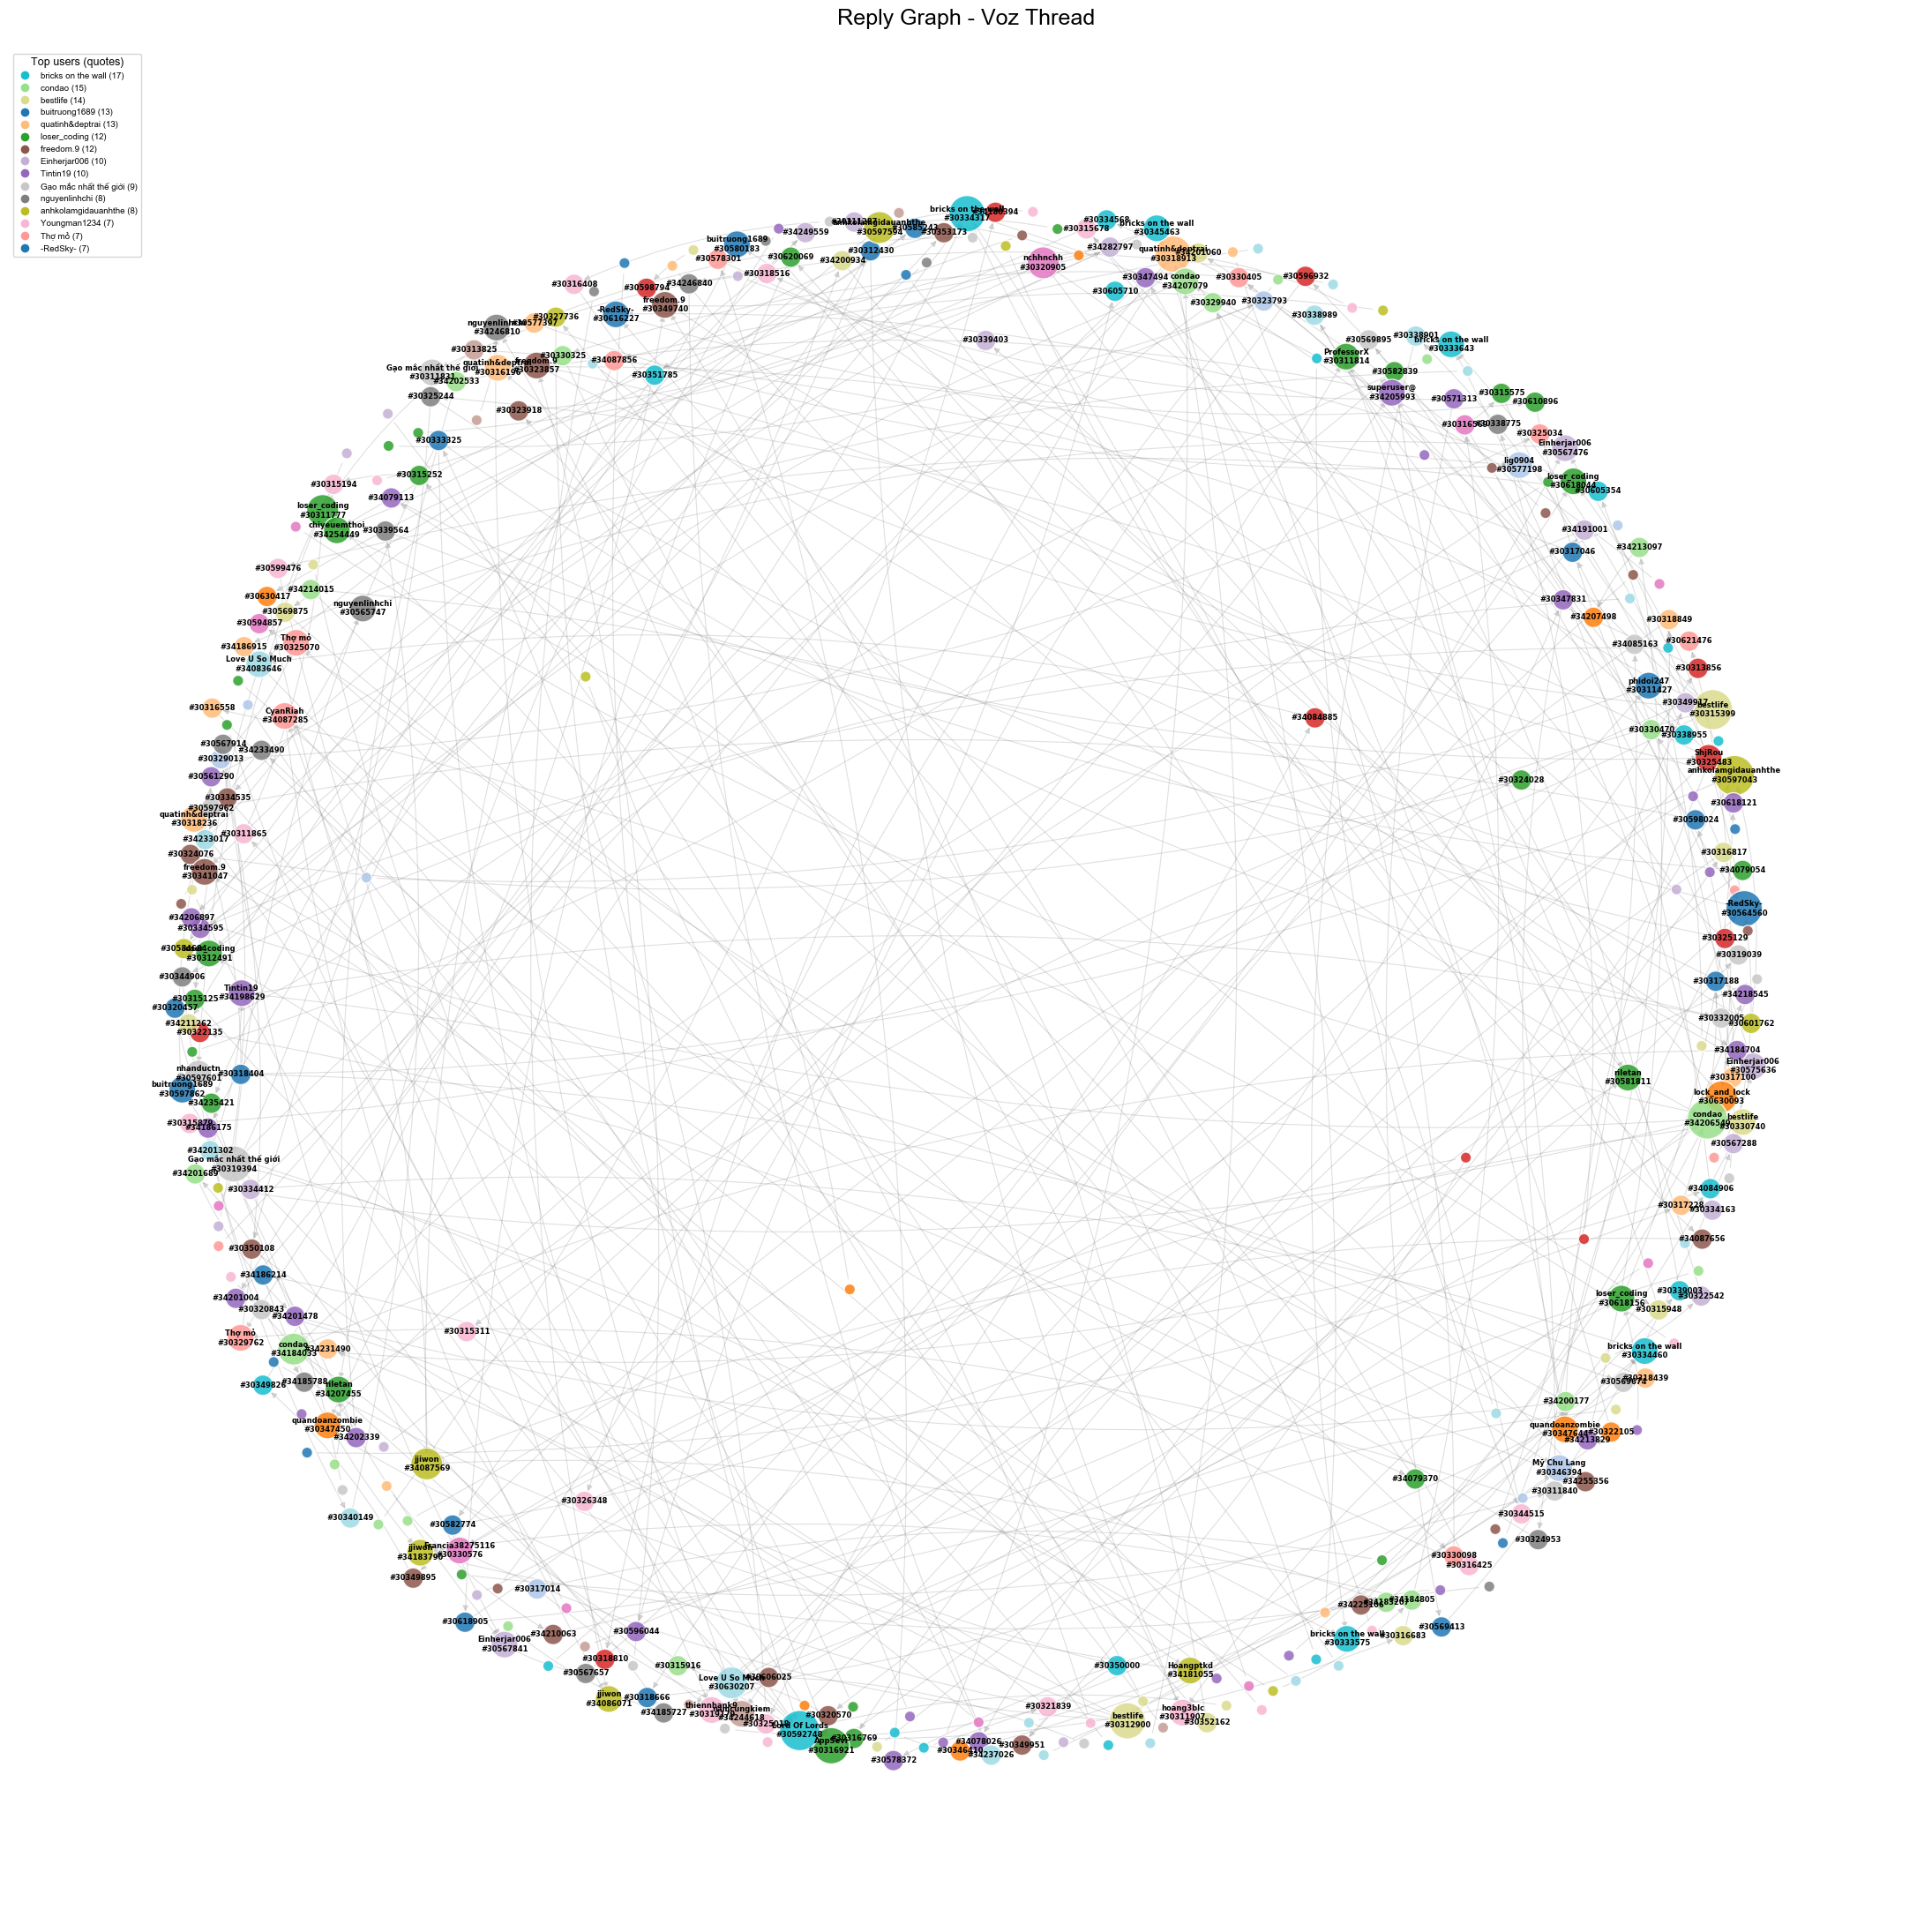

In [5]:
plot_reply_graph(G, title="Reply Graph - Voz Thread")